# Generate binary masks of all points below a certain metric height

In [1]:
%load_ext autoreload

In [2]:
%autoreload
import os
import time
from PIL import Image
from math import sin, cos, pi, tan
import numpy as np
import cv2
import argparse
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision.models import vgg
from BoundingBox3D.yolo.yolo import cv_Yolo
from BoundingBox3D.torch_lib.Dataset import *
from BoundingBox3D.torch_lib import Model, ClassAverages
from BoundingBox3D.library.Math import *
from BoundingBox3D.library.Plotting import *
import os
from data_utils import download_SV_img as download_sv

from MegaDepth import test as megadepth_test

from MegaDepth.options.train_options import TrainOptions

from viz import show_2D_bbox, show_flood, show_seg_mask, generate_binary_mask
from segmentation import segmentation
from core_utils import filter_segmentation, get_thresh_coords_megadepth
from math import atan, tan, radians
import yaml


In [3]:
config_file = './config/config_default.yaml'

with open(config_file, 'r') as stream:
    config = yaml.safe_load(stream)

In [4]:
# Define some gps location for street view 
if not config['addresses_from_csv']:
    addresses =  config['addresses']
key = config['key']
save_SV_path =  config['save_SV_path']
save_DM_path = config['save_DM_path']
crop = config['crop']
megadepth_path = config['megadepth_path']
weights_path = config['weights_path']
yolo_path = config['yolo_path']
classes = config['classes']
img_size = config['img_size']
H, W = img_size
FOVx = 2*atan(tan(radians(config['init_FOVx']))*((W/2)-crop)/(W/2))
FOVy = 2*atan(tan(radians(config['init_FOVy']))*((H/2)-crop)/(H/2))
thresholds = config['thresholds']
segmentation_path = config['segmentation_path']
output_path = config['output_path']
save_seg_path = config['save_seg_path']
merge_mask = config['merge_mask']

In [5]:
# Download images from the adresses
output_paths = download_sv.get_images([download_sv.param_block(address, key) for address in addresses],save_SV_path, crop_print=crop) 


if not os.path.exists(output_path):
    os.mkdir(output_path)
    
depth_paths = []
for img_file in output_paths:
    path_depth = megadepth_test.get_depthmap_img(img_file, save_DM_path, img_size, megadepth_path)
    depth_paths.append(path_depth + '.npy')

model_lst = [x for x in sorted(os.listdir(weights_path)) if x.endswith('.pkl')]
if len(model_lst) == 0:
    print('No previous model found, please train first!')
    exit()
else:
    print('Using previous model %s'%model_lst[-1])
    my_vgg = vgg.vgg19_bn(pretrained=True)
    # TODO: load bins from file or something
    model = Model.Model(features=my_vgg.features, bins=2).cuda()
    checkpoint = torch.load(weights_path + '/%s'%model_lst[-1])
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

yolo = cv_Yolo(yolo_path)
averages = ClassAverages.ClassAverages()
angle_bins = generate_bins(2)

All images fetched
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000000_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000001_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000002_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000003_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000004_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000005_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000006_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000007_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000008_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000009_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000010_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000011_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000012_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000013_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000014_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000015_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000016_depth
We are done
===========================================LOADING Hourglass NETWORK====================================================
./MegaDepth/checkpoints/test_local/best_generalization_net_G.pth
model [HGModel] was created
[512, 512]
============================= TEST ============================


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved to files ./gen_masks_data/gsv_000017_depth
We are done
Using previous model epoch_10.pkl


In [6]:
merge_mask

True

Segmentation done
car
bicycle
car
keeping2/3 detected objects
(512, 512, 3)


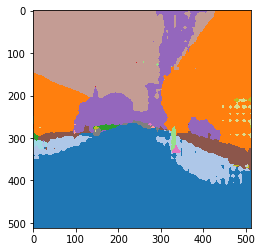

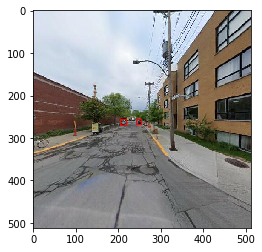

[1]
-1.30577638872127 -2.9203135098106117
height of the detected object of class car in meters is : 1.5023581
./trash/masks/gsv_000000_0-8_mask.jpg
[1]
-1.30577638872127 -2.9203135098106117
height of the detected object of class car in meters is : 1.5023581
./trash/masks/gsv_000000_1-5_mask.jpg
Segmentation done
bicycle
keeping0/1 detected objects
(512, 512, 3)


<Figure size 432x288 with 0 Axes>

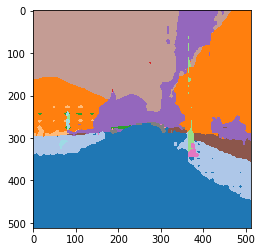

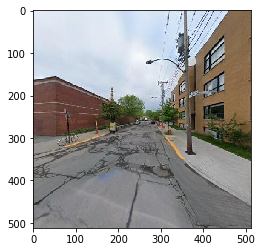

Segmentation done
keeping0/0 detected objects
(512, 512, 3)


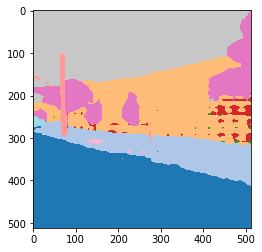

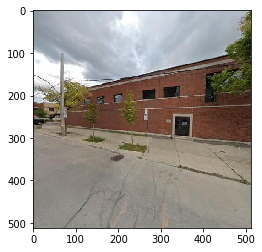

Segmentation done
car
car
car
truck
car
car
car
keeping7/7 detected objects
(512, 512, 3)


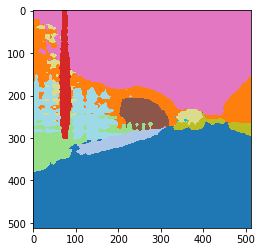

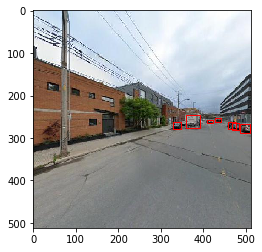

[0, 1, 2, 3, 4, 5, 6]
-0.5128533407288103 -3.4816263571662915
height of the detected object of class car in meters is : 1.5110716
-2.170055516309361 -6.850763552740972
height of the detected object of class car in meters is : 1.6052505
-2.404909633669355 -7.733413382980366
height of the detected object of class car in meters is : 1.5097221
3.857624876255869 -4.298824936580829
height of the detected object of class truck in meters is : 3.4733536
-2.1414261155819787 -6.046606904269439
height of the detected object of class car in meters is : 1.5066893
-2.488423679399233 -6.435377444289372
height of the detected object of class car in meters is : 1.558815
1.4789943276437754 -2.414646761101224
height of the detected object of class car in meters is : 1.5065849
./trash/masks/gsv_000003_0-8_mask.jpg
[0, 1, 2, 3, 4, 5, 6]
-0.5128533407288103 -3.4816263571662915
height of the detected object of class car in meters is : 1.5110716
-2.170055516309361 -6.850763552740972
height of the detected obje

<Figure size 432x288 with 0 Axes>

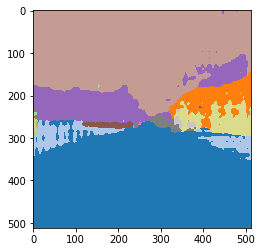

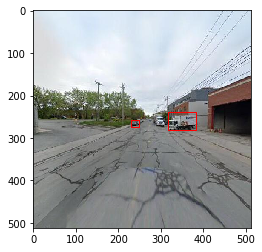

[1]
-1.1338210000418698 -2.4010618456378126
height of the detected object of class car in meters is : 1.5489671
./trash/masks/gsv_000004_0-8_mask.jpg
[1]
-1.1338210000418698 -2.4010618456378126
height of the detected object of class car in meters is : 1.5489671
./trash/masks/gsv_000004_1-5_mask.jpg
Segmentation done
car
car
car
car
car
car
keeping6/6 detected objects
(512, 512, 3)


<Figure size 432x288 with 0 Axes>

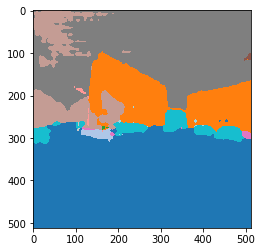

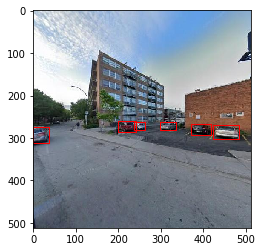

[0, 1, 2, 3, 4, 5]
-1.3722571473333716 -4.36759170975154
height of the detected object of class car in meters is : 1.5078387
-0.7750297796072303 -3.03685138107533
height of the detected object of class car in meters is : 1.5359887
-1.4627821675047912 -3.8351039978481367
height of the detected object of class car in meters is : 1.4720359
-2.787811724714828 -5.775835090147378
height of the detected object of class car in meters is : 1.5041798
-0.6794371121026721 -2.9019835173172304
height of the detected object of class car in meters is : 1.4949925
-0.9134271974036103 -2.5304183605999846
height of the detected object of class car in meters is : 1.5465969
./trash/masks/gsv_000005_0-8_mask.jpg
[0, 1, 2, 3, 4, 5]
-1.3722571473333716 -4.36759170975154
height of the detected object of class car in meters is : 1.5078387
-0.7750297796072303 -3.03685138107533
height of the detected object of class car in meters is : 1.5359887
-1.4627821675047912 -3.8351039978481367
height of the detected object 

<Figure size 432x288 with 0 Axes>

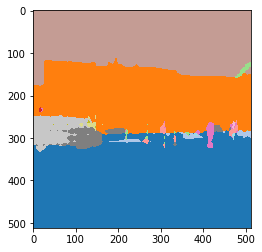

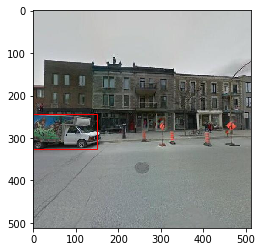

[0]
2.430079979597487 -16.150280889251484
height of the detected object of class truck in meters is : 3.390987
./trash/masks/gsv_000006_0-8_mask.jpg
[0]
2.430079979597487 -16.150280889251484
height of the detected object of class truck in meters is : 3.390987
./trash/masks/gsv_000006_1-5_mask.jpg
Segmentation done
car
car
car
car
car
car
car
keeping7/7 detected objects
(512, 512, 3)


<Figure size 432x288 with 0 Axes>

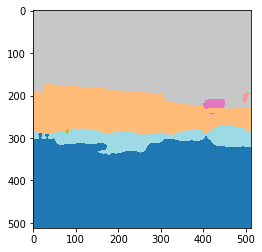

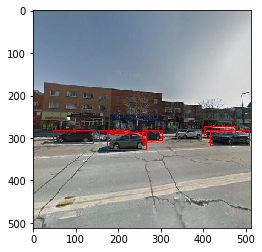

[0, 1, 2, 3, 4, 5, 6]
-7.721890956898022 -17.18173255679077
height of the detected object of class car in meters is : 1.5324596
-7.4987158724348575 -16.510382174941128
height of the detected object of class car in meters is : 1.5454103
-7.605187711026176 -16.625918935597767
height of the detected object of class car in meters is : 1.555183
-7.792128256635934 -14.174115649307538
height of the detected object of class car in meters is : 1.4947572
-8.805456694552973 -13.799523236707657
height of the detected object of class car in meters is : 1.5489283
-7.680819047208317 -13.693869098874956
height of the detected object of class car in meters is : 1.4876035
-5.1416044373095104 -11.917734588084784
height of the detected object of class car in meters is : 1.4745662
./trash/masks/gsv_000007_0-8_mask.jpg
[0, 1, 2, 3, 4, 5, 6]
-7.721890956898022 -17.18173255679077
height of the detected object of class car in meters is : 1.5324596
-7.4987158724348575 -16.510382174941128
height of the detected 

<Figure size 432x288 with 0 Axes>

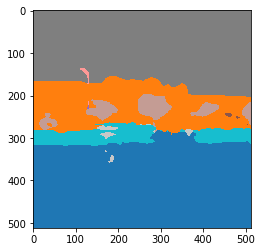

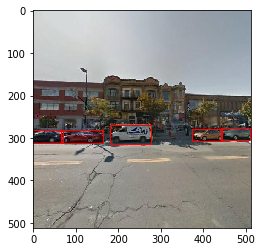

[0, 1, 2, 3, 4]
-5.7278133426326505 -12.950545322965745
height of the detected object of class car in meters is : 1.5234346
-6.796038512495613 -14.721122647368361
height of the detected object of class car in meters is : 1.587511
-5.237206568557681 -12.604929596578536
height of the detected object of class car in meters is : 1.4613366
-6.80938157012416 -14.828699632316216
height of the detected object of class car in meters is : 1.5536914
-3.0023405521852027 -14.287657778777415
height of the detected object of class car in meters is : 1.5712457
./trash/masks/gsv_000008_0-8_mask.jpg
[0, 1, 2, 3, 4]
-5.7278133426326505 -12.950545322965745
height of the detected object of class car in meters is : 1.5234346
-6.796038512495613 -14.721122647368361
height of the detected object of class car in meters is : 1.587511
-5.237206568557681 -12.604929596578536
height of the detected object of class car in meters is : 1.4613366
-6.80938157012416 -14.828699632316216
height of the detected object of cla

<Figure size 432x288 with 0 Axes>

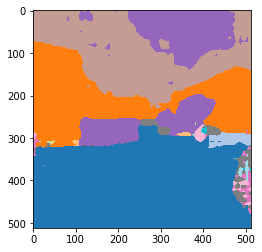

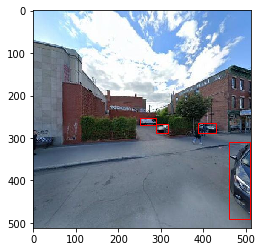

[1, 2, 3]
-2.814308208201709 -7.362965911633843
height of the detected object of class car in meters is : 1.507172
-2.6240339027615605 -6.215072818548826
height of the detected object of class car in meters is : 1.4954337
0.29420526865648355 -4.009099046337283
height of the detected object of class car in meters is : 1.6586725
./trash/masks/gsv_000009_0-8_mask.jpg
[1, 2, 3]
-2.814308208201709 -7.362965911633843
height of the detected object of class car in meters is : 1.507172
-2.6240339027615605 -6.215072818548826
height of the detected object of class car in meters is : 1.4954337
0.29420526865648355 -4.009099046337283
height of the detected object of class car in meters is : 1.6586725
./trash/masks/gsv_000009_1-5_mask.jpg
Segmentation done
car
car
car
car
keeping4/4 detected objects
(512, 512, 3)


<Figure size 432x288 with 0 Axes>

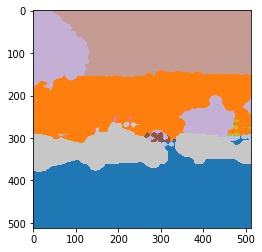

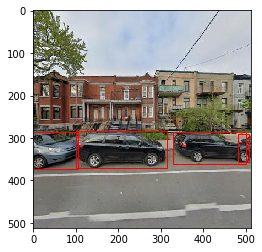

[0, 1, 2, 3]
-2.671207547761817 -8.063682634914766
height of the detected object of class car in meters is : 1.4996378
-2.981369848067473 -8.01030810835723
height of the detected object of class car in meters is : 1.4656492
-3.5034788133256036 -8.518850675206544
height of the detected object of class car in meters is : 1.5003304
-4.631681514156611 -7.859968713109396
height of the detected object of class car in meters is : 1.5011631
./trash/masks/gsv_000010_0-8_mask.jpg
[0, 1, 2, 3]
-2.671207547761817 -8.063682634914766
height of the detected object of class car in meters is : 1.4996378
-2.981369848067473 -8.01030810835723
height of the detected object of class car in meters is : 1.4656492
-3.5034788133256036 -8.518850675206544
height of the detected object of class car in meters is : 1.5003304
-4.631681514156611 -7.859968713109396
height of the detected object of class car in meters is : 1.5011631
./trash/masks/gsv_000010_1-5_mask.jpg
Segmentation done
car
car
car
car
car
car
car
keep

<Figure size 432x288 with 0 Axes>

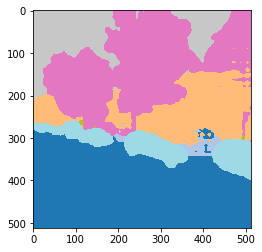

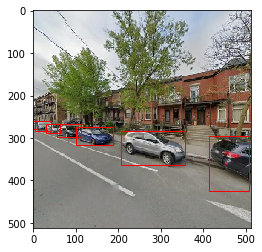

[0, 1, 2, 3, 4, 5, 6]
-6.8226593868099314 -16.071276796191086
height of the detected object of class car in meters is : 1.4885231
-7.089995927431907 -22.88763319889243
height of the detected object of class car in meters is : 1.5015444
-9.474795076182957 -26.362705815460053
height of the detected object of class car in meters is : 1.4993256
-4.341156077362811 -13.254105671709837
height of the detected object of class car in meters is : 1.5558254
-5.18047828398872 -11.858894229114796
height of the detected object of class car in meters is : 1.5719517
-3.891787551209063 -11.322109073469832
height of the detected object of class car in meters is : 1.6363256
-2.5310085746139634 -9.679582398273439
height of the detected object of class car in meters is : 1.5656984
./trash/masks/gsv_000011_0-8_mask.jpg
[0, 1, 2, 3, 4, 5, 6]
-6.8226593868099314 -16.071276796191086
height of the detected object of class car in meters is : 1.4885231
-7.089995927431907 -22.88763319889243
height of the detected o

<Figure size 432x288 with 0 Axes>

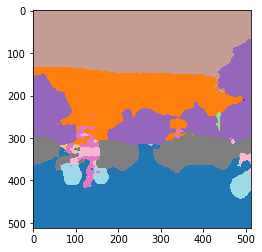

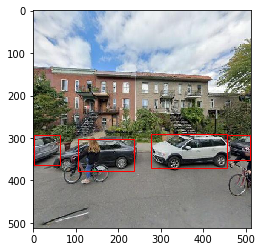

[0, 1, 2, 3]
-4.954649461126522 -15.111653860081162
height of the detected object of class car in meters is : 1.5304184
-5.615669848588993 -14.232786386584962
height of the detected object of class car in meters is : 1.5248277
-6.967300198656112 -12.76984356742242
height of the detected object of class car in meters is : 1.5006576
-6.514399858110508 -16.00498293313167
height of the detected object of class car in meters is : 1.4324131
./trash/masks/gsv_000012_0-8_mask.jpg
[0, 1, 2, 3]
-4.954649461126522 -15.111653860081162
height of the detected object of class car in meters is : 1.5304184
-5.615669848588993 -14.232786386584962
height of the detected object of class car in meters is : 1.5248277
-6.967300198656112 -12.76984356742242
height of the detected object of class car in meters is : 1.5006576
-6.514399858110508 -16.00498293313167
height of the detected object of class car in meters is : 1.4324131
./trash/masks/gsv_000012_1-5_mask.jpg
Segmentation done
car
car
car
keeping3/3 detec

<Figure size 432x288 with 0 Axes>

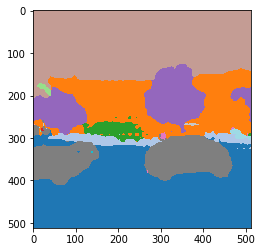

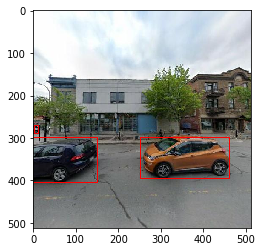

[0, 1, 2]
-3.283225128817172 -8.156793303307262
height of the detected object of class car in meters is : 1.5187836
-3.5798592306897987 -9.977037145312647
height of the detected object of class car in meters is : 1.5396256
-0.9996101853846113 -2.3769728052840797
height of the detected object of class car in meters is : 1.4463708
./trash/masks/gsv_000013_0-8_mask.jpg
[0, 1, 2]
-3.283225128817172 -8.156793303307262
height of the detected object of class car in meters is : 1.5187836
-3.5798592306897987 -9.977037145312647
height of the detected object of class car in meters is : 1.5396256
-0.9996101853846113 -2.3769728052840797
height of the detected object of class car in meters is : 1.4463708
./trash/masks/gsv_000013_1-5_mask.jpg
Segmentation done
car
car
car
car
car
car
car
car
car
car
car
car
keeping12/12 detected objects
(512, 512, 3)


<Figure size 432x288 with 0 Axes>

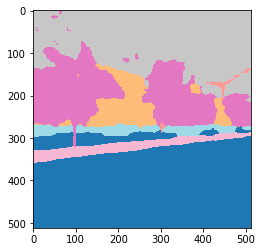

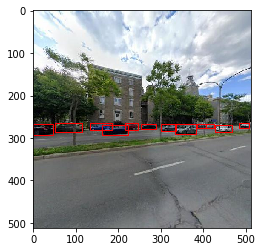

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]
-2.3721712670005957 -5.85445113997816
height of the detected object of class car in meters is : 1.4651855
-2.537666208201898 -5.962850929325114
height of the detected object of class car in meters is : 1.545725
-2.7905783023447484 -4.643676330347539
height of the detected object of class car in meters is : 1.4753773
-2.899952244609011 -6.384912171260126
height of the detected object of class car in meters is : 1.6006987
-2.2276972454566675 -4.7459062228263775
height of the detected object of class car in meters is : 1.474076
-2.5743289888891354 -4.5952393320838425
height of the detected object of class car in meters is : 1.5135143
-2.6320712680817024 -4.455133741281024
height of the detected object of class car in meters is : 1.5984002
-1.8534206637372677 -6.177369287789354
height of the detected object of class car in meters is : 1.502171
-2.3414917255607506 -5.53961956181594
height of the detected object of class car in meters is : 1.5238956
-2.563

<Figure size 432x288 with 0 Axes>

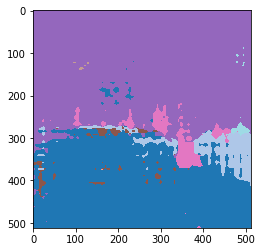

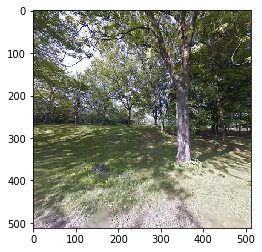

Segmentation done
car
car
car
car
keeping4/4 detected objects
(512, 512, 3)


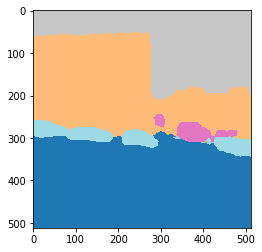

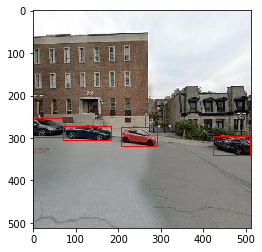

[0, 1, 2, 3]
-2.824207605228654 -8.056484033279773
height of the detected object of class car in meters is : 1.4508451
-1.946375754371001 -6.22834237899567
height of the detected object of class car in meters is : 1.4591537
-0.22542532595193165 -5.5943109822756725
height of the detected object of class car in meters is : 1.5484235
-5.531548481537406 -11.231262559637337
height of the detected object of class car in meters is : 1.45211
./trash/masks/gsv_000016_0-8_mask.jpg
[0, 1, 2, 3]
-2.824207605228654 -8.056484033279773
height of the detected object of class car in meters is : 1.4508451
-1.946375754371001 -6.22834237899567
height of the detected object of class car in meters is : 1.4591537
-0.22542532595193165 -5.5943109822756725
height of the detected object of class car in meters is : 1.5484235
-5.531548481537406 -11.231262559637337
height of the detected object of class car in meters is : 1.45211
./trash/masks/gsv_000016_1-5_mask.jpg
Segmentation done
traffic light
car
keeping1/2 d

<Figure size 432x288 with 0 Axes>

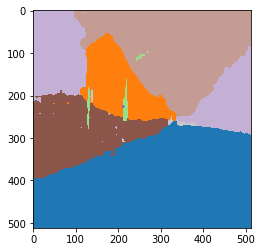

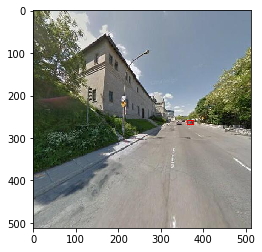

[]
./trash/masks/gsv_000017_0-8_mask.jpg


/network/home/tengmeli/.conda/envs/megadepth/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/network/home/tengmeli/.conda/envs/megadepth/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[]
./trash/masks/gsv_000017_1-5_mask.jpg


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
paths_detect = []
for ind, img_file in enumerate(output_paths):
    truth_img = cv2.imread(img_file)
    img = np.copy(truth_img)
    yolo_img = np.copy(truth_img)
    detections = yolo.detect(yolo_img)

    masks = segmentation.segment_19classes([img_file], segmentation_path, save_seg_path)
    show_seg_mask(masks[0])
    mask = np.load(masks[0])

    detections_keep = []
    for elem in detections: 
        print(elem.detected_class)
        if elem.detected_class  in classes.keys():
            detections_keep.append(elem)
    print("keeping" + str(len(detections_keep)) + '/' + str(len(detections)) + " detected objects")
    detections = detections_keep
    show_2D_bbox(img_file, detections, save_path =  None)
    ground = Image.fromarray(mask == 0 ).convert('1')
    #if no object is detected, output will be the mask corresponding to the road
    ground.save( output_path + os.path.basename(img_file[:-4]) + '_'+ 'ground_mask.jpg')

    if len(detections_keep) != 0:
        #paths_detect.append(path2D_bbox)

        depth = np.load(depth_paths[ind])

        #Enter metric threshold
        for threshold in thresholds:
            coords, threshs = get_thresh_coords_megadepth(img, threshold, depth, FOVx, FOVy, detections, mask, classes, model,pix_threshold = 0.3, epsilon = 0)
            show_flood(img, np.mean(threshs), coords, save_path = save_seg_path + os.path.basename(img_file[:-4]) + '_' + str(threshold).replace('.', '-') +'_flood.jpg')
            binary_mask = generate_binary_mask(img, np.mean(threshs), coords, output_path + os.path.basename(img_file[:-4]) + '_'+ str(threshold).replace('.', '-') + '_mask.jpg')
            print( output_path + os.path.basename(img_file[:-4]) + '_'+ str(threshold).replace('.', '-') + '_mask.jpg')

            #merge ground + flood masks
            if merge_mask:
                output_mask = Image.fromarray(np.array(binary_mask) + np.array(ground))
                output_mask.save(output_path + os.path.basename(img_file[:-4]) + '_'+ str(threshold).replace('.', '-') + '_ground_mask.jpg')            